In [26]:
import DepthEstimator as dm
model = dm.DepthEstimator()
depth, image = model.estimate_depth(
    url="https://th.bing.com/th/id/OIP.65J4HM4LFzGWtQ4AU-vjtQHaGF?w=204&h=180&c=7&r=0&o=5&dpr=1.6&pid=1.7",
    retur_image=True
)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


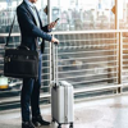

In [47]:
image

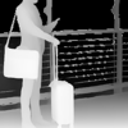

In [48]:
depth

In [ ]:
import requests
import json
import base64
from io import BytesIO
from PIL import Image

# URL and API key
url = "https://developers.cathaypacific.com/hackathon-apigw/hackathon-middleware/v1/vertex-ai/google-gemini"
headers = {
    'Content-Type': 'application/json',
    'apiKey': '0Ws2MAmAseTl39JZLohswZZgWLCxpZ1K',
}
para = '''{
    'fx': 1000,  # Focal length in pixels (mm)
    'fy': 1000,  # Focal length in pixels
    'cx': 640,   # Image center (X)
    'cy': 360,   # Image center (Y)
    'distortion': [0.1, -0.05, 0, 0, 0]  # Example distortion coefficients
}'''

def pil_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")
def resize_image(image, max_size=(800, 800)):
    new_size = (128, 128)
    resized_image = image.resize(new_size)
    resized_image.save('example_resized.jpg')
    return resized_image

# image = resize_image(image)
# depth = resize_image(depth)
depth_image_base64 = pil_to_base64(depth)  
image_base64 = pil_to_base64(image)  

payload = json.dumps({
    "contents": [
        {
            "role": "user",
            "parts": [
                {"text": "Based on the gray scale depth graph of an image and the original image what is the possible luggage size? Provide a json with width, height, depth as the luggage size."},
                {"inline_data": {"mime_type": "image/jpeg", "data": depth_image_base64}},  # Correct base64 encoding for depth image
                {"inline_data": {"mime_type": "image/jpeg", "data": image_base64}}  # Correct base64 encoding for original image
            ]
        }
    ]
})

headers = {
  'Content-Type': 'application/json',
  'apiKey': '0Ws2MAmAseTl39JZLohswZZgWLCxpZ1K',
  'Cookie': '_abck=B91A7A0E6FA6E8DC1F90ABEF64592C68~-1~YAAQFtgjFzvuFu6SAQAAP5UVAAwUR2PKAmUxGYiSZ3ca9Mj0zJuOllsxH+PMN/RpJqZF5bcp3DA2jnImsjzVAUt/iASXYYdkwUzJKYIUyXZs1LbTii8a5eG270pFLD6WBViDyQeFbyejNejllLCIFUVqihFv6FtfsNYOrQpR0q9OzaUKSoT0qcPu/dKmb9kNJXqlbPGYbi5E2f6I0njjAmuW7oWcM42LhzgtziYz/h1C7tHvDHV5WJIgfnLy0tZ3Ubn6/3uvd71/+Fi5WexFaZN8TR/OsO1y6SXuTYCqOlyjTH2qSfImlIQYB3565r8jzAXfPkFCOA2kqsaKYc9NzAU8QPr1IU5sjJu8jzrkhnPWTBFdzCeVhubhJVvn43U5hDBAf8QfL2TDQkaznlL1y4eNTDFC/AfXPdVKwGtjvZSL~-1~-1~-1; ak_bmsc=874F31B36E7E9AFC003BA25C54B3B504~000000000000000000000000000000~YAAQFtgjF/rpF+6SAQAAJGMqABmSGCYkA1d70JyxapLSP1HtAmtz8b/I30XlaVUw0d0lL4+jkMqXXwlOXl8biL8gdCl/B9IhUkRw1hxszH+uMeSI29wKw1u8Bzpod2J2jZoalOTmr8UVNZeaseBEp7qHhHV4Xl5F4Xyo+NWknVkxkQXLsgVPF7Sde7ggiNKIvW3v/9wQhLGDRLg9yMbueBTQ7cC9ajr9Qu16EtcRxRlv+ISTtc1Unu+aiJvWT43JwpBxcIj1DkgL+Wun8bw1kTsk4rgVeNh/8gAcPMMnISNNyzEh2Hq0GixsnwgGYIhLlgGEsUewJdTug0QLZMCxphG5B1sv1zFmF+ZkSAZxAoXjA3Q=; bm_sz=2764E7F333811D7110624CAD88E5D14A~YAAQFtgjFzzuFu6SAQAAP5UVABlRcWBlZ5AHsa5pKgI08jB5d7S06l+ZE79hn3U5Ul0c4Mbn0s/p9zQJISOx7bmdn6rJ5Q5b4sGs4YwNkwnUZdX0rjicNgonMd6Yh8tZNlhhiFgwJWdHz+5iQDVIMy52O6fRcPhr9fi3mct3JelDSMi+gUsfrPvKx7i7jK2Zuw3N5a6Rtu7KsWfPIYKY9bFKBbyuN6WVjqds10ztzaV/qO4bK5rElrRkpOQK6CYWU+FyGkUNafgloHiMAwOn9kPzBh15DDfqTSXGSQmDhw926duAlPmWX/hrcRIFXLXXSbLp8qEg14RTnec3XP3+6B9irzeItK5l0tIubuVnJE/RvAUVk4M=~4276784~4534582; 8bac6ca36dd7fb6e1a5df804509d965c=0c86393222528be065d396c1cb85b093; 91d1e5aa2d49f01a98ca619ad658207a=8a1d967d5717d68ece76a567f1b31bb0'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)

json_response = response.json()  # Attempt to parse the response as JSON
print(json.dumps(json_response, indent=4))  # Pretty-print the JSON response

{"candidates":[{"content":{"role":"model","parts":[{"text":"It's impossible to accurately determine the luggage dimensions (width, height, depth) from just the provided images and depth map.  The depth map gives a sense of distance from the camera but doesn't provide calibrated measurements.  To get accurate dimensions, one would need:\n\n* **Calibration information:** Knowledge of the camera's focal length, sensor size, and distance to the luggage.\n* **Object recognition and scale estimation:**  A system that can identify the luggage and estimate its size relative to known objects (e.g., the person's height).\n\nTherefore, I cannot provide a JSON with dimensions.  Any values I could give would be pure speculation and unreliable.\n"}]},"finishReason":"STOP","avgLogprobs":-0.3985004830867686}],"usageMetadata":{"promptTokenCount":551,"candidatesTokenCount":141,"totalTokenCount":692},"modelVersion":"gemini-1.5-flash-002"}
{
    "candidates": [
        {
            "content": {
         